In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Mean-field modeling using ordinary differential equations

Sander Hansen - 10995080

* *Explain briefly each type of ODE from the Terminology section above*
  
  1. A seperable ODE is an ODE that can be written in the following form; $$F(y)dy=G(x)dx$$
    This means that both sides can be integrated. It's called seperable because we seperate the variables
    
  2. A linear ODE is an ODE that can be written in the following form;         $$\frac{dy}{dx}+f(x)y=g(x)$$
    So a non linear ODE is an ODE which can't be written in the form above. The form above tells us that we can sum partial solutions together to get the final solution.
    
  3. A first order differential equation is an equation without any powers. While a second order differential equation is an equation with powers, like the following;
        $$a\frac{d^2y}{dx^2}+b\frac{dy}{dx}+cy$$
        
* *Explain briefly each type of solution from the Terminology section above*

  1. An implicit solution calculates the current and the later time step. While an explicit solution only calculates the later time step. Implicit solutions are used when more accuracy is needed.
        An explicit solution calculates the solution of a later time step.
  2. Fixed point solutions is a way of solving which iterates over a function. You will find a value for x such that x doesn't change anymore. This is ofcourse when the derriative is zero. So we can set our ODE equal to 0.
  3. A fixed point is stable if you take a point close to the fixed point and while you go further in time it will stay close to this point. It is unstable if it moves further away in time.
  
* *Implement the simple Euler algorithm for estimating the solution x(t) of a given single $ODE\ dx/dt = f(x, t)$. For each of the following three ODEs, derive an analytical solution and validate your Euler implementation against it by integrating from t = 0 to t = 3:*
   1. $dx/dt = 1, with\ x(0) = 0$
   2. $dx/dt = 2t, with\ x(0) = -4$
   3. $dx/dt = -x, with\ x(0) = 4$

 *Experiment with different values for the time step, ∆t = 1, ∆t = 0.1 and ∆t = 0.01. Do
this by plotting both the analytical solution and the numerical approximation in the same
figure. For which equation(s) does your result improve?*
  

dx/dt = 1, with x(0) = 0


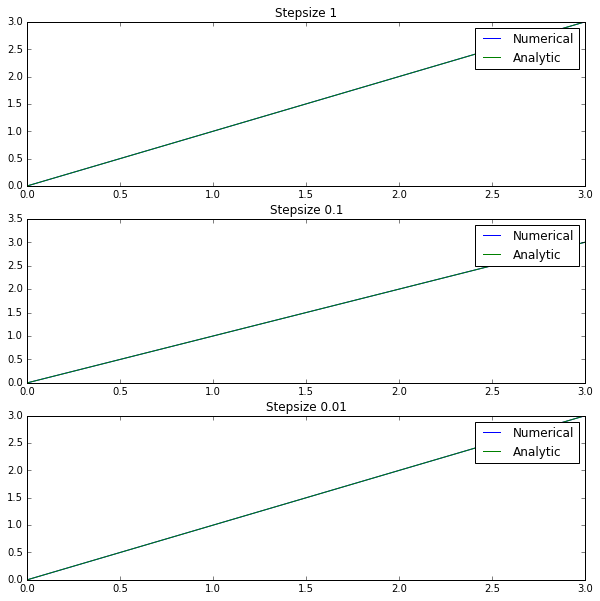

dx/dt = 2t, with x(0) = -4


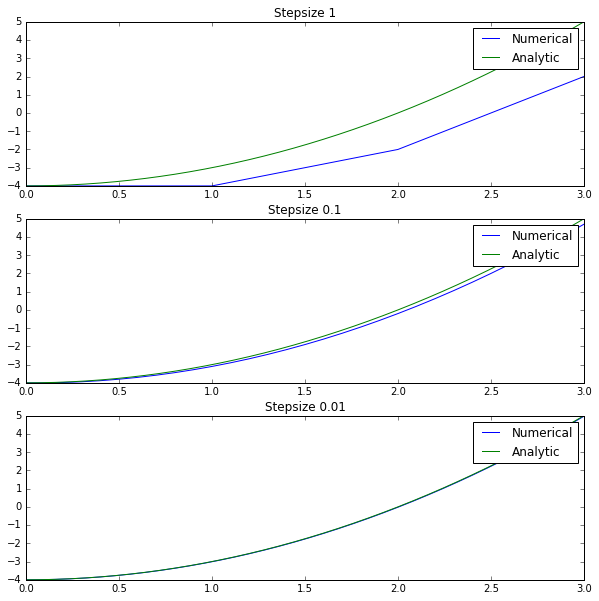

dx/dt = -x, with x(0) = 4


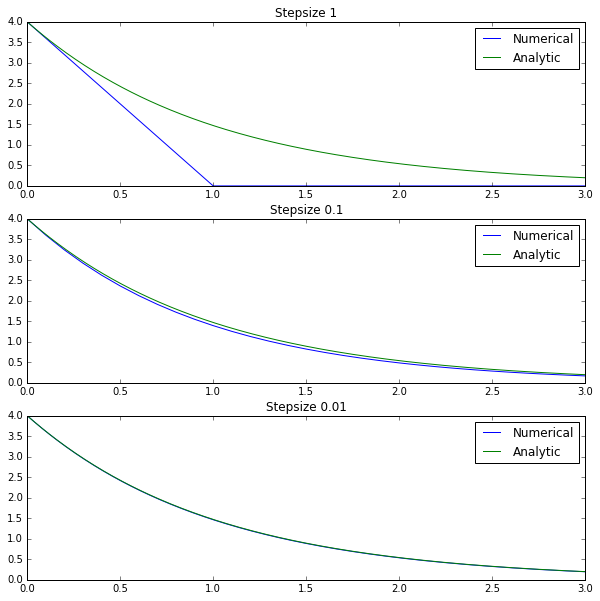

In [11]:
def simple_euler(f, x0, t0, h, t):
    result = np.array([x0])
    for _ in range(t0 * 100, t * 100, int(h * 100)):
        x0 = x0 + (f(t0, x0) * h)
        t0 = t0 + h
        result = np.append(result, [x0])
    return result

def f(t, x):
    return 1

def f1(t, x):
    return 2 * t

def f2(t, x):
    return -x

def a1(t):
    return t

def a2(t):
    return t**2 - 4

def a3(t):
    return 4 * np.e**(-t)

x_1 = np.arange(0, 4, 1)
x_01 = np.arange(0, 3.1, 0.1)
x_001 = np.arange(0, 3.01, 0.01)

plt.figure(figsize=(10,10))
print("dx/dt = 1, with x(0) = 0")
numerical_1 = simple_euler(f, 0, 0, 1, 3)
plt.subplot(3,1,1)
plt.plot(x_1, numerical_1)
plt.plot(x_001, a1(x_001))
plt.legend(["Numerical", "Analytic"])
plt.title("Stepsize 1")

numerical_1 = simple_euler(f, 0, 0, 0.1, 3)
plt.subplot(3,1,2)
plt.plot(x_01, numerical_1)
plt.plot(x_001, a1(x_001))
plt.legend(["Numerical", "Analytic"])
plt.title("Stepsize 0.1")

numerical_1 = simple_euler(f, 0, 0, 0.01, 3)
plt.subplot(3,1,3)
plt.plot(x_001, numerical_1)
plt.plot(x_001, a1(x_001))
plt.legend(["Numerical", "Analytic"])
plt.title("Stepsize 0.01")

plt.show()

plt.figure(figsize=(10,10))
print("dx/dt = 2t, with x(0) = -4")
numerical_2 = simple_euler(f1, -4, 0, 1, 3)
plt.subplot(3,1,1)
plt.plot(x_1, numerical_2)
plt.plot(x_001, a2(x_001))
plt.legend(["Numerical", "Analytic"])
plt.title("Stepsize 1")


numerical_2 = simple_euler(f1, -4, 0, 0.1, 3)
plt.subplot(3,1,2)
plt.plot(x_01, numerical_2)
plt.plot(x_001, a2(x_001))
plt.legend(["Numerical", "Analytic"])
plt.title("Stepsize 0.1")


numerical_2 = simple_euler(f1, -4, 0, 0.01, 3)
plt.subplot(3,1,3)
plt.plot(x_001, numerical_2)
plt.plot(x_001, a2(x_001))
plt.legend(["Numerical", "Analytic"])
plt.title("Stepsize 0.01")

plt.show()


plt.figure(figsize=(10,10))
print("dx/dt = -x, with x(0) = 4")
numerical_3 = simple_euler(f2, 4, 0, 1, 3)
plt.subplot(3,1,1)
plt.plot(x_1, numerical_3)
plt.plot(x_001, a3(x_001))
plt.legend(["Numerical", "Analytic"])
plt.title("Stepsize 1")


numerical_3 = simple_euler(f2, 4, 0, 0.1, 3)
plt.subplot(3,1,2)
plt.plot(x_01, numerical_3)
plt.plot(x_001, a3(x_001))
plt.legend(["Numerical", "Analytic"])
plt.title("Stepsize 0.1")


numerical_3 = simple_euler(f2, 4, 0, 0.01, 3)
plt.subplot(3,1,3)
plt.plot(x_001, numerical_3)
plt.plot(x_001, a3(x_001))
plt.legend(["Numerical", "Analytic"])
plt.title("Stepsize 0.01")

plt.show()


As you can see in the above figures the smaller the stepsize the more accurate the numerical approach will be.

The following three are the analytical solutions;

1. $\frac{dx}{dt} = 1 \\
dx = dt \\
\int dx = \int dt \\
x = t + C \\
x(0) = 1 \\
x(t) = 1$

2. $\frac{dx}{dt} = 2t \\
dx = 2t * dt \\
\int dx = \int 2t * dt \\
x = t^2 + C \\
x(0) = -4 \\
x(t) = t^2 - 4$

3. $\frac{dx}{dt} = -x \\
\frac{1}{-x}dx = dt \\
\int \frac{1}{-x}dx = \int dt \\
-ln(x) = t + C \\
x = e^{-t}+C \\
x = C*e^{-t} \\
x(0) = 4 \\
x(t) = 4*e^{-t}$

*You now have a (crude) tool with which you can later check your analytical results.*

*(Analytical) Consider the concentration of a specific protein over time in a biological cell,
 denoted x(t). Assume that these protein molecules are generated at a constant rate (increasing
 the concentration). Each protein also has a constant rate at which it degrades
 (decreasing the concentration). Thus we can model this simple system by the ODE*
 
 $$\frac{dx}{dt} = g - k * x$$
 
 * *(Analytical) Mention briefly the role of g and the role of k in this model.*
 
 g will be the rate at which new proteins will spawn while k will define how fast they 'die'.
 
 
 * *(Analytical) Find an explicit solution for x(t) in the general case.*
 
 $\frac{dx}{dt}=g-k*x \\
 dx*\frac{1}{g-k*x}=dt \\
 \int dx*\frac{1}{g-k*x}=dt \\
 -\frac{1}{k} * ln(g-k*x) = t + C_0\\
 ln(g-k*x) = (t + C_0) * -k\\
 g-k*x = e^{(t + C_0) * -k}\\
 -k*x = e^{(t + C_0) * -k} - g\\
-k*x = e^{-k*t}*e^{C_0 * -k} - g\\
-k * x = C_1 * e^{-k*t} - g \\
x = \frac{C_1}{-k}*e^{-k*t} - \frac{g}{-k}\\
x(t) = C_2*e^{-k*t} + \frac{g}{k}
 $
 
* *Your solution should include an additional constant that is currently unknown. What is the role of this constant?*

 This constant will determine the spawn rate, so at which speed the protein will be generated.


* *(Analytical) Now solve this ODE assuming the initial condition: x(0) = 0. In the remaining questions we will assume this solution*

 $ x(0) = 0 \\
 C_2 * e^{-k*0} + \frac{g}{k} = 0\\
 C_2 * 1 + \frac{g}{k} = 0\\
 C_2 = -\frac{g}{k}
 $


* *(Analytical) Plot the following four curves of x(t) versus t in the same figure, over the range 0 ≤ t ≤ 5. (Can you already guess how g and k determine the long-term behavior?)*
 * g = 2, k =3
 * g = 1, k = 1.5
 * g = 2, k = 2
 * g = 1, k = 1


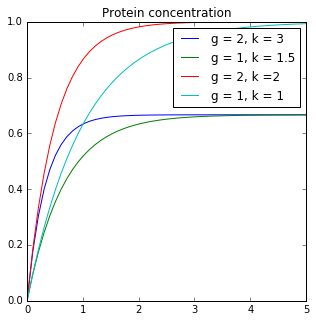

In [12]:
def protein(g, k, t):
    return C(g, k) * np.e**(-k*t) + g/k
    
def C(g, k):
    return -g/k

t = np.linspace(0,5)
x1 = protein(2, 3, t)
x2 = protein(1, 1.5, t)
x3 = protein(2, 2, t)
x4 = protein(1, 1, t)

plt.figure(figsize=(5,5))
plt.plot(t, x1, t, x2, t, x3, t, x4)
plt.legend(["g = 2, k = 3", "g = 1, k = 1.5", "g = 2, k =2", "g = 1, k = 1"])
plt.title("Protein concentration")
plt.show()

* *(Numerical) Check the above results by numerical integration. Use a time step less than 0.1/k.*

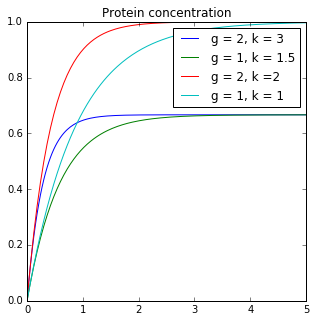

In [13]:
def f(g, k, x):
    return g - k * x

def simple_euler(f, x0, t0, h, t, g, k):
    result = np.array([x0])
    for _ in range(t0 * 100, t * 100, int(h * 100)):
        x0 = x0 + (f(g, k, x0) * h)
        t0 = t0 + h
        result = np.append(result, [x0])
    return result
    
    
x1 = simple_euler(f, 0, 0, float(0.1 / 3), 5, 2, 3)
t1 = np.linspace(0, 5, x1.shape[0])
x2 = simple_euler(f, 0, 0, float(0.1 / 3), 5, 1, 1.5)
t2 = np.linspace(0, 5, x1.shape[0])
x3 = simple_euler(f, 0, 0, float(0.1 / 3), 5, 2, 2)
t3 = np.linspace(0, 5, x1.shape[0])
x4 = simple_euler(f, 0, 0, float(0.1 / 3), 5, 1, 1)
t4 = np.linspace(0, 5, x1.shape[0])

plt.figure(figsize=(5,5))
plt.plot(t1, x1, t2, x2, t3, x3, t4, x4)
plt.legend(["g = 2, k = 3", "g = 1, k = 1.5", "g = 2, k =2", "g = 1, k = 1"])
plt.title("Protein concentration")
plt.show()

As we can see the two graphs are matching.

* *(Analytical) Derive the expression for the fixed point(s) to which x(t) settles in general, so in terms of g and k.*
 
 The derivative needs to be zero. So,
 
 $\frac{dx}{dt}=g-k*x=0\\
 -k*x=-g\\
 x=\frac{g}{k}
 $
 
* *(Analytical) Plot dx/dt versus x(t) for the values g = 2 and k = 3. Try a few other parameter values yourself. Use this figure to explain whether this ODE is unstable, locally stable, or globally stable.*
 

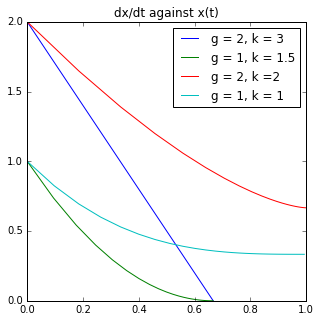

In [14]:
t = np.linspace(0,5)
x = protein(2, 3, t)
y = f(2, 3, x)
x1 = protein(1, 1.5, t)
y1 = f(1, 1.5, x)
x2 = protein(2, 2, t)
y2 = f(2, 2, x)
x3 = protein(1, 1, t)
y3 = f(1, 1, x)

plt.figure(figsize=(5,5))
plt.plot(x, y, x1, y1, x2, y2, x3, y3)
plt.legend(["g = 2, k = 3", "g = 1, k = 1.5", "g = 2, k =2", "g = 1, k = 1"])
plt.title("dx/dt against x(t)")
plt.show()

The fixed points are;
x = 2/3
x = 2/3
x = 1
x = 1

As we can see the ODE is locally stable because not all the values are moving all the way to the fixed point.

* *(Thought experiment) Suppose that g can now change over time, that is, g(t) is now a function of time t. Suppose that at time t = t0 the stable concentration of the protein is too low for the purpose of the cell. Biological cells can adapt to such situations. In this example, the cell can do nothing to change k since the decay rate depends on the chemistry of the protein molecule. But it can change the rate at which it produces new protein molecules, g. Assume that the cell can freely change g over time in order to make the new stable concentration, say, 100% higher. Sketch manually a possible graph of g over time of how the cell could achieve its goal, and explain its features. (Can you find a second possible shape, depending on how ’opportunistic’ the cell changes g?)*

<img src="files/DSC_0117.JPG">
It will be like this because it can not start up growing at once it will slowly increase the spawn rate. Of course a new stable point will be reached, this will be after about 100%. G needs to become twice as big.

* *(Explain) Explain briefly why you think this model is called a ’mean-field’ or ’mean-field approximation’ model.*
 A mean field approximation model is roughly explained a simpler model of a more difficult problem. There are probably more factors which will effect g and k, but we all 'put' them in two variables. Which will approximate the effect of all the factors but just in those variables

* *Consider a population of rabbits and assume unlimited resources and space. Let us assume that each rabbit has a constant rate k of dying at any given time. Consider the case where each rabbit can always easily find another rabbit, so that the reproduction only depends on the population of rabbits x(t) itself (i.e., the more rabbits, the more new rabbits). Consider that each rabbit has a constant reproduction ate r. A simple ODE that models this situation can be:*
$$\frac{dx}{dt}=r*x-k*x$$
 
*Explain briefly why.*

Each rabbit will produce r rabbits at each time step. So the spawning rate would be, r * x. They would also die at a constant rate, this will be k, so k * x. We have to substract the dying from the spawning, then we would get, r *  - k * x

* *(b) (Analytical) Solve this ODE for the general case. (Tip: remember that logarithms do not operate on negative arguments, be mindful when integrating.)*

$\frac{dx}{dt} = r*x-k*x \\
dx*\frac{1}{r*x-k*x} = dt \\
\int dx*\frac{1}{r*x-k*x} = dt \\
\frac{1}{r-k}*ln(r*x-k*x) = t + C_0 \\
ln(r*x-k*x) = (t + C_0) * (r - k) \\
r*x-k*x = e^{(t + C_0) * (r - k)} \\
x(r-k) = e^{(t + C_0) * (r - k)} \\
x = \frac{e^{(t + C_0) * (r - k)}}{r-k} \\
x = C_1 * e^{t * (r - k)}
$

* *(Analytical) Sketch the three typical behaviors of x(t) in one figure. What are the fixed points, if any? If there are fixed points, are they stable (mathematically speaking)?*

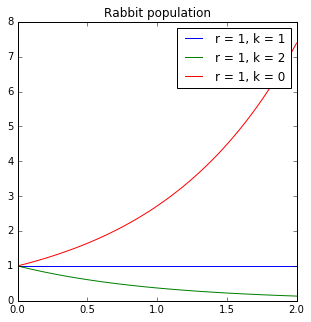

In [26]:
def rabbit(t, C, r, k):
    return C * np.e**(t*(r-k))

t = np.linspace(0,2)
x1 = rabbit(t, 1, 1, 1)
x2 = rabbit(t, 1, 1, 2)
x3 = rabbit(t, 1, 1, 0)

plt.figure(figsize=(5,5))
plt.plot(t, x1, t, x2, t, x3)
plt.legend(["r = 1, k = 1", "r = 1, k = 2", "r = 1, k = 0"])
plt.title("Rabbit population")
plt.show()

As we can see we have a fixed point of value 0. This one is stable.

* *(Numerical) Check your results numerically. Negative numbers of rabbits are not possible.*

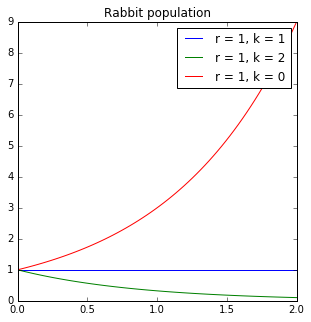

In [28]:
def f(r, k, x):
    return r * x - k * x
    
x1 = simple_euler(f, 1, 0, float(0.1 / 3), 2, 1, 1)
t1 = np.linspace(0, 2, x1.shape[0])
x2 = simple_euler(f, 1, 0, float(0.1 / 3), 2, 1, 2)
t2 = np.linspace(0, 2, x1.shape[0])
x3 = simple_euler(f, 1, 0, float(0.1 / 3), 2, 1, 0)
t3 = np.linspace(0, 2, x1.shape[0])

plt.figure(figsize=(5,5))
plt.plot(t1, x1, t2, x2, t3, x3)
plt.legend(["r = 1, k = 1", "r = 1, k = 2", "r = 1, k = 0"])
plt.title("Rabbit population")
plt.show()

As we can see, the results are the same.

* *(Analytical) In biology it is impossible to fix a rate accurately up to an infinite number of digits. There is just too much fluctuation and environmental influence for that. So consider that k and r are both very slightly (infinitesimally) changed during a simulation. Which fixed points of the three typical cases are affected by this and which remain unchanged (stable)?*

 The fixed point 0, will not stay stable because r and k will be affected so the point will probably 'move'.
 
 
* *(Analytical) Now assume that the reproduction also depends on the concentration of rabbits, meaning that rabbits find a mate more easily if there are more rabbits. This University of Amsterdam Modelling and Simulation (2016) Math exercise sheet 1: ODE means that if the density is low, then reproduction should be low, and if the density is high, then reproduction is high. We’ll assume that there is no limit to the number of partners that a rabbit can have in a given time-frame. We can then change the ODE to include this effect in the simplest manner as follows (explain why):*

$$\frac{dx}{dt} = r * x * x - k * x$$

It is easy to imagine that only the spawn rate (r) will be affected by this extra condition. So if there are more rabbits there is a bigger chance of finding a 'partner'. x * x would be logical because a rabbit could reproduce with x other rabbits.

* *(Numerical) Now study the equation numerically for k = 1, r = 1 and x0 = 0.5, x0 = 1.0 and x0 = 1. Plot the results in a single figure. Note that your numerical integrator may not be able to compute all results due to overflow. Stop such an integration if x exceeds a limit of your own choosing.*

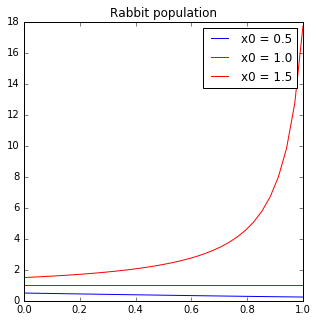

In [31]:
def f(r, k, x):
    return r * x * x - k * x
    
x1 = simple_euler(f, 0.5, 0, float(0.1 / 3), 1, 1, 1)
t1 = np.linspace(0, 1, x1.shape[0])
x2 = simple_euler(f, 1.0, 0, float(0.1 / 3), 1, 1, 1)
t2 = np.linspace(0, 1, x1.shape[0])
x3 = simple_euler(f, 1.5, 0, float(0.1 / 3), 1, 1, 1)
t3 = np.linspace(0, 1, x1.shape[0])

plt.figure(figsize=(5,5))
plt.plot(t1, x1, t2, x2, t3, x3)
plt.legend(["x0 = 0.5", "x0 = 1.0", "x0 = 1.5"])
plt.title("Rabbit population")
plt.show()

As we can see the population of Rabbits will increase rapidly if there are more rabbits to reproduce with. Which is of course quite logical.

* *(Numerical) Above, you have studied some simple population models for rabbits with infinite food and space. A more realistic model that takes these constraints into account is the famous logistic differential equation, which is essentially obtained by flipping the sign of dx/dt in the previous equation and renaming the constants:*

$$\frac{dx}{dt}=x(1-x/x_{max})$$
* *The analytic solution for this equation is actually given in the lecture slides on ODEs. Let’s study it numerically. Plot a few curves (’numerical approximations’) for two different initial conditions and two different values for xmax in a single figure. What is the biological meaning of xmax?*

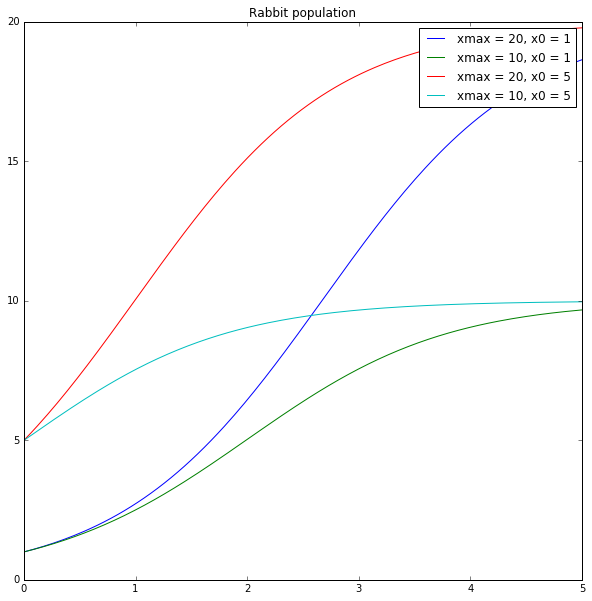

In [34]:
def f(x, xmax):
    return x * (1 - x / xmax)
 
def simple_euler(f, x0, t0, h, t, xmax):
    result = np.array([x0])
    for _ in range(t0 * 100, t * 100, int(h * 100)):
        x0 = x0 + (f(x0, xmax) * h)
        t0 = t0 + h
        result = np.append(result, [x0])
    return result

x1 = simple_euler(f, 1, 0, float(0.1 / 3), 5, 20)
t1 = np.linspace(0, 5, x1.shape[0])
x2 = simple_euler(f, 1, 0, float(0.1 / 3), 5, 10)
t2 = np.linspace(0, 5, x1.shape[0])
x3 = simple_euler(f, 5, 0, float(0.1 / 3), 5, 20)
t3 = np.linspace(0, 5, x1.shape[0])
x4 = simple_euler(f, 5, 0, float(0.1 / 3), 5, 10)
t4 = np.linspace(0, 5, x1.shape[0])

plt.figure(figsize=(10,10))
plt.plot(t1, x1, t2, x2, t3, x3, t4, x4)
plt.legend(["xmax = 20, x0 = 1", "xmax = 10, x0 = 1", "xmax = 20, x0 = 5", "xmax = 10, x0 = 5"])
plt.title("Rabbit population")
plt.show()

xmax would ofcourse be the maximum population. So we could see it as a constant that will keep track of the amount of food that is available in the living area of the rabbits.

* *(Analysis) Now explain briefly in your own words how this ODE implements the notion of population dynamics with bounded resources. For instance, in the previous assignment about rabbits you first had a positive term in the ODE which results in exponential growth. Then you added a factor that models the ’difficulty’ of finding mates if the density is low. Compare this to the factor that is added now.*

 The factor that is added right now will give a boundary to how big the size of the rabbit population can be. So while more rabbits means a bigger chance of repopulating it also means that it can overcrowd and rabbits will 'die'.